NYC 311 Noise Complaint Analysis (Tech Internship Test)
Author:Syed Rayyan Ahmed  
Date:5th May 2025  
Goal:Analyze 311 service request data related to noise complaints in NYC over the last 30 days.  
This project uses real NYC Open Data, Python, and data visualization to explore urban noise patterns.



Part 1: Query NYC Open Data API


In [129]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

print("All libraries reloaded!")


All libraries reloaded!


In [131]:
# Function to fetch 311 noise complaints from NYC Open Data API (last 30 days)
def fetch_noise_complaints(limit=1000):
    base_url = "https://data.cityofnewyork.us/resource/erm2-nwe9.json"
    
    # Get today's date minus 30 days
    thirty_days_ago = (datetime.now() - timedelta(days=30)).isoformat()

    # Set up query parameters
    params = {
        "$limit": limit,
        "$where": f"complaint_type='Noise' AND created_date >= '{thirty_days_ago}'",
        "$select": "complaint_type,borough,created_date,descriptor"
    }

    # Make the request
    response = requests.get(base_url, params=params)

    if response.status_code == 200:
        print("Data fetched successfully!")
        return pd.DataFrame(response.json())
    else:
        print(f"Failed to fetch data. Status code: {response.status_code}")
        return pd.DataFrame()


In [133]:
# Fetch the data and store it in a DataFrame
noise_df = fetch_noise_complaints()


Data fetched successfully!


In [134]:
# Display the first few rows
noise_df.head()


,complaint_type,borough,created_date,descriptor
0,Noise,MANHATTAN,2025-04-06T21:47:00.000,Noise: Construction Before/After Hours (NM1)
1,Noise,BROOKLYN,2025-04-08T21:17:00.000,Noise: Alarms (NR3)
2,Noise,BROOKLYN,2025-04-08T22:17:00.000,Noise: Construction Before/After Hours (NM1)
3,Noise,BROOKLYN,2025-04-08T13:38:00.000,Noise: Construction Equipment (NC1)
4,Noise,MANHATTAN,2025-04-08T11:02:00.000,"Noise, Barking Dog (NR5)"


In [135]:
#View dataset structure: data types, column info
noise_df.info()

#Check for missing values in each column
print("Missing values per column:")
print(noise_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   complaint_type  1000 non-null   object
 1   borough         1000 non-null   object
 2   created_date    1000 non-null   object
 3   descriptor      1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB
Missing values per column:
complaint_type    0
borough           0
created_date      0
descriptor        0
dtype: int64


In [139]:
#Get the top 3 most common noise complaint descriptors
top_descriptors = noise_df['descriptor'].value_counts().head(3)

print("Top 3 Noise Complaint Descriptors:")
print(top_descriptors)


Top 3 Noise Complaint Descriptors:
descriptor
Noise: Construction Before/After Hours (NM1)    384
Noise, Barking Dog (NR5)                        157
Noise: Construction Equipment (NC1)             128
Name: count, dtype: int64


In [141]:
#Create a summary table of descriptor counts
summary_table = noise_df['descriptor'].value_counts().reset_index()
summary_table.columns = ['Descriptor', 'Count']

#Show the top 10 descriptors
summary_table.head(10)

,Descriptor,Count
0,Noise: Construction Before/After Hours (NM1),384
1,"Noise, Barking Dog (NR5)",157
2,Noise: Construction Equipment (NC1),128
3,Noise: Alarms (NR3),126
4,Noise: air condition/ventilation equipment (NV1),88
5,"Noise, Ice Cream Truck (NR4)",39
6,Noise: Jack Hammering (NC2),33
7,Noise: Private Carting Noise (NQ1),17
8,Noise: lawn care equipment (NCL),10
9,"Noise, Other Animals (NR6)",9


In [143]:
#Remove rows where the descriptor is missing (optional cleanup)
noise_df = noise_df.dropna(subset=['descriptor'])

### Summary of Top Noise Complaint Descriptors

The top 3 noise complaint descriptors in the past 30 days are:
- Noise: Construction Before/After Hours
- Noise: Alarms
- Noise: Barking Dog

These complaints are most likely concentrated in residential areas or places undergoing construction. The high number of complaints reflects typical urban noise patterns.


In [146]:
#Count number of noise complaints reported in each borough
borough_counts = noise_df['borough'].value_counts()

print("Noise Complaints per Borough:")
print(borough_counts)


Noise Complaints per Borough:
borough
MANHATTAN        431
BROOKLYN         244
QUEENS           193
BRONX             99
STATEN ISLAND     33
Name: count, dtype: int64


In [148]:
#Group the data by borough and descriptor to count occurrences
descriptor_by_borough = noise_df.groupby(['borough', 'descriptor']).size().reset_index(name='count')

#Show the top combinations
descriptor_by_borough.sort_values(by='count', ascending=False).head(10)

,borough,descriptor,count
26,MANHATTAN,Noise: Construction Before/After Hours (NM1),204
14,BROOKLYN,Noise: Construction Before/After Hours (NM1),87
38,QUEENS,Noise: Construction Before/After Hours (NM1),62
27,MANHATTAN,Noise: Construction Equipment (NC1),62
31,MANHATTAN,Noise: air condition/ventilation equipment (NV1),51
9,BROOKLYN,"Noise, Barking Dog (NR5)",45
36,QUEENS,Noise: Alarms (NR3),44
32,QUEENS,"Noise, Barking Dog (NR5)",39
24,MANHATTAN,Noise: Alarms (NR3),35
0,BRONX,"Noise, Barking Dog (NR5)",33


### Borough & Descriptor Insights

Manhattan reported the most noise complaints, followed closely by Brooklyn.  
The most common descriptors in Manhattan were related to construction noise, while Brooklyn had a mix of alarms and barking dog complaints.  
This could be due to construction activity in commercial zones vs. residential density in other boroughs.


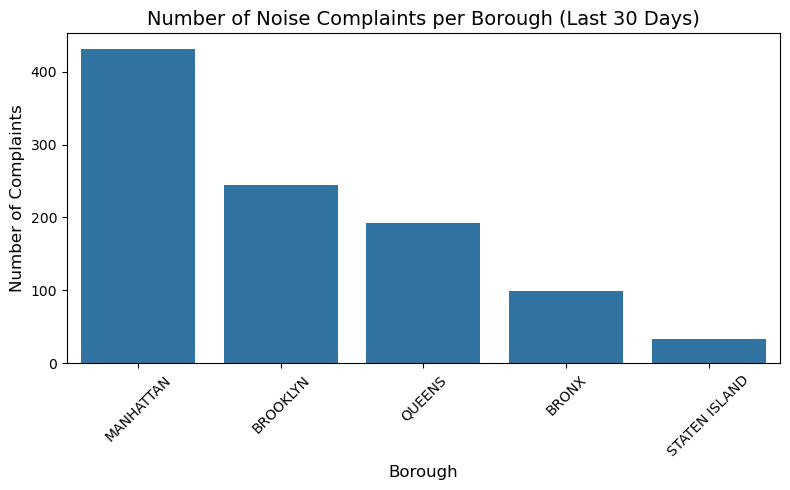

In [151]:
#Create a bar chart showing the number of noise complaints reported in each NYC borough

# Step 1: Set the figure size for the plot (width=8, height=5 inches)
plt.figure(figsize=(8, 5))

# Step 2: Create a count plot using seaborn to count number of complaints per borough
#         The 'order' argument sorts boroughs by complaint count (most to least)
sns.countplot(
    data=noise_df,
    x='borough',
    order=noise_df['borough'].value_counts().index
)

# Step 3: Add a title to the plot
plt.title("Number of Noise Complaints per Borough (Last 30 Days)", fontsize=14)

# Step 4: Label the x-axis
plt.xlabel("Borough", fontsize=12)

# Step 5: Label the y-axis
plt.ylabel("Number of Complaints", fontsize=12)

# Step 6: Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Step 7: Adjust layout so labels/titles don’t get cut off
plt.tight_layout()

# Step 8: Display the final plot
plt.show()


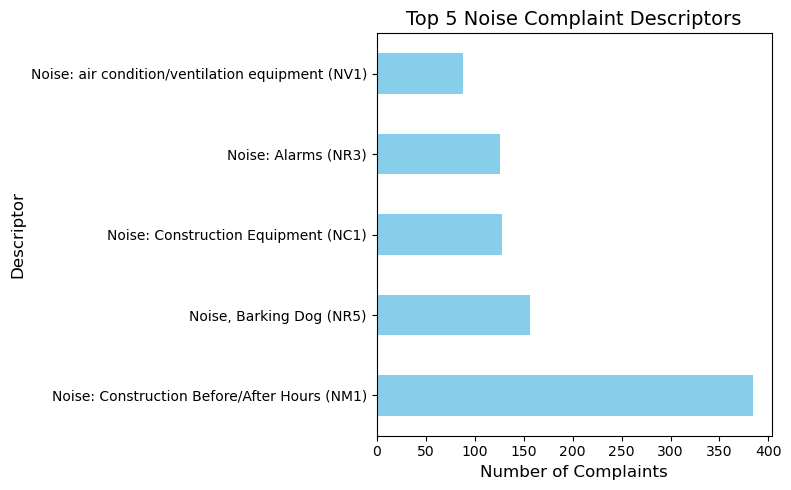

In [153]:
#Horizontal bar chart showing the top 5 most common noise complaint descriptors

# Step 1: Get the top 5 most frequent descriptors from the dataset
top5 = noise_df['descriptor'].value_counts().head(5)

# Step 2: Set the size of the figure (width=8, height=5 inches)
plt.figure(figsize=(8, 5))

# Step 3: Plot a horizontal bar chart using the top 5 descriptors
# 'barh' = horizontal bar chart; color is set to 'skyblue' for readability
top5.plot(kind='barh', color='skyblue')

# Step 4: Add a title to the chart
plt.title("Top 5 Noise Complaint Descriptors", fontsize=14)

# Step 5: Label the x-axis (number of complaints)
plt.xlabel("Number of Complaints", fontsize=12)

# Step 6: Label the y-axis (descriptors)
plt.ylabel("Descriptor", fontsize=12)

# Step 7: Automatically adjust layout to avoid overlapping text
plt.tight_layout()

# Step 8: Show the plot
plt.show()



In [155]:
# 📊 Create pivot table for heatmap: boroughs as rows, descriptors as columns
pivot = noise_df.pivot_table(
    index='borough',
    columns='descriptor',
    aggfunc='size',
    fill_value=0
)


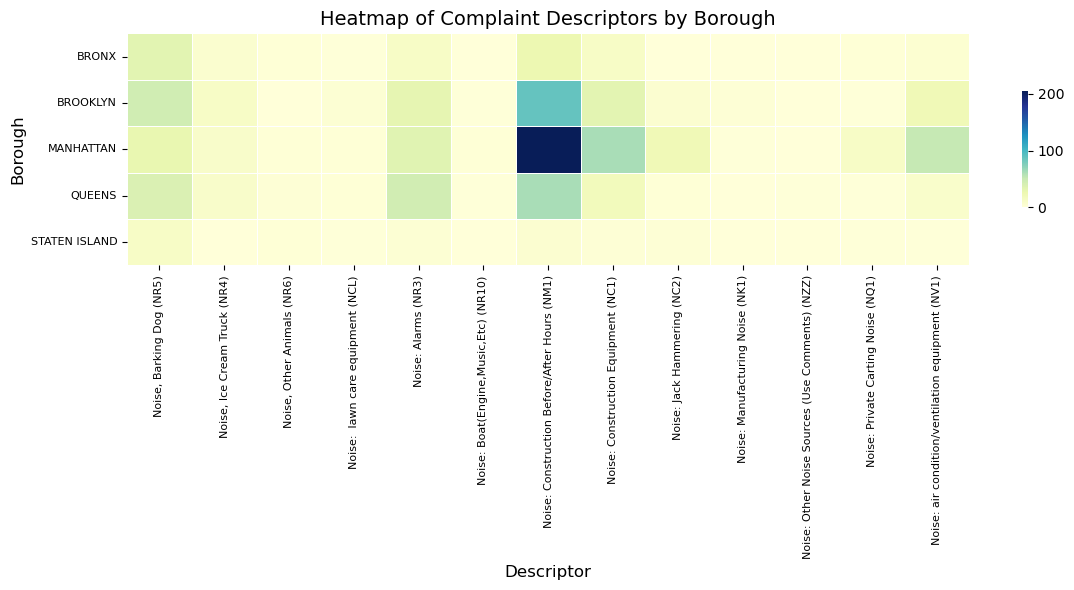

In [157]:
#Heatmap to visualize frequency of noise complaint descriptors by borough

# Step 1: Set the figure size to make the heatmap wide enough for all descriptors
plt.figure(figsize=(12, 6))

# Step 2: Create the heatmap using seaborn
# - 'pivot' is the DataFrame with boroughs as rows and descriptors as columns
# - 'cmap' controls the color scale ("YlGnBu" = Yellow-Green-Blue palette)
# - 'linewidths' adds separation lines between cells
# - 'cbar_kws' shrinks the color bar for better layout
sns.heatmap(
    pivot,
    cmap="YlGnBu",
    linewidths=0.5,
    cbar_kws={"shrink": 0.5}  # Shrink colorbar for a cleaner look
)

# Step 3: Add a title and axis labels with custom font sizes
plt.title("Heatmap of Complaint Descriptors by Borough", fontsize=14)
plt.xlabel("Descriptor", fontsize=12)
plt.ylabel("Borough", fontsize=12)

# Step 4: Format the tick labels to prevent overlap and improve readability
plt.xticks(fontsize=8, rotation=90)  # Rotate x-axis labels vertically
plt.yticks(fontsize=8, rotation=0)   # Keep y-axis labels horizontal

# Step 5: Adjust layout to make sure everything fits well
plt.tight_layout()

# Step 6: Display the heatmap
plt.show()



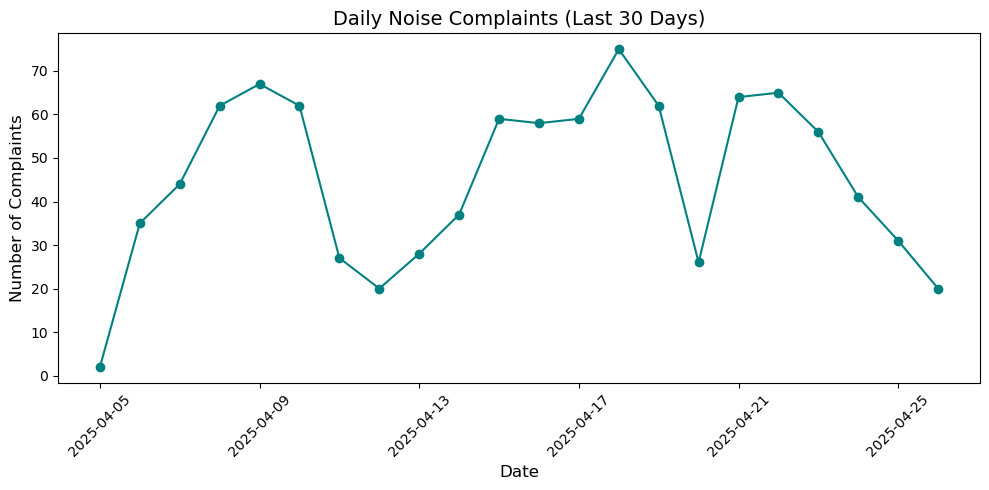

In [159]:
#Line chart showing the number of noise complaints reported per day over the last 30 days

# Step 1: Convert 'created_date' column to datetime format (if it's not already)
# This ensures we can extract dates and times easily
noise_df['created_date'] = pd.to_datetime(noise_df['created_date'])

# Step 2: Extract only the date part (drop the time) and store it in a new column
noise_df['date'] = noise_df['created_date'].dt.date

# Step 3: Set figure size for the line plot (10x5 inches)
plt.figure(figsize=(10, 5))

# Step 4: Count number of complaints per date, sort by date, and plot as a line
# This will show how complaints trend over time
noise_df['date'].value_counts().sort_index().plot(
    kind='line',
    marker='o',         # Add circular markers for clarity
    linestyle='-',      # Line style
    color='teal'        # Custom line color
)

# Step 5: Add chart title and axis labels
plt.title("Daily Noise Complaints (Last 30 Days)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Complaints", fontsize=12)

# Step 6: Rotate x-axis labels so dates don't overlap
plt.xticks(rotation=45)

# Step 7: Automatically adjust layout
plt.tight_layout()

# Step 8: Show the plot
plt.show()


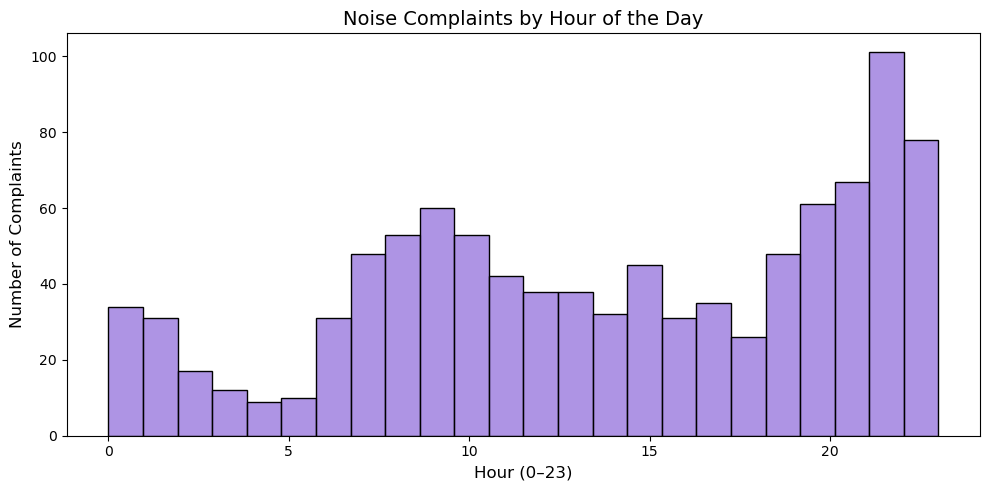

In [161]:
#Analyze and visualize how noise complaints vary by hour of the day

# Step 1: Extract the hour (0–23) from the 'created_date' timestamp
# This allows us to group complaints based on the time they were reported
noise_df['hour'] = noise_df['created_date'].dt.hour

# Step 2: Set the figure size for the histogram (10 inches wide, 5 inches tall)
plt.figure(figsize=(10, 5))

# Step 3: Create a histogram using seaborn
# - 'bins=24' ensures one bin for each hour of the day
# - 'kde=False' disables the kernel density estimate curve
sns.histplot(noise_df['hour'], bins=24, kde=False, color='mediumpurple')

# Step 4: Add a descriptive title and axis labels
plt.title("Noise Complaints by Hour of the Day", fontsize=14)
plt.xlabel("Hour (0–23)", fontsize=12)
plt.ylabel("Number of Complaints", fontsize=12)

# Step 5: Optimize spacing so everything fits nicely
plt.tight_layout()

# Step 6: Render the final plot
plt.show()


Chart 1:
Manhattan and Brooklyn have the highest complaint volumes, possibly due to population density and commercial activity.

Chart 2:
Construction-related complaints dominate, followed by alarms and barking dogs — typical urban noise sources.
    